In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
df = pd.read_csv('mymoviedb.csv', lineterminator = '\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [279]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [280]:
df.duplicated().sum()

np.int64(0)

In [281]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [282]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [283]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [284]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [285]:
df.head(2)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...


In [286]:
cols=['Overview','Original_Language','Poster_Url']
df.drop(cols, axis=1, inplace=True)

In [287]:
def categorize_col(df, col, labels):
    edge = [df[col].describe()['min'],
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']]
    df[col] = pd.cut(df[col], edge, labels = labels, duplicates = 'drop')

    return df
    

In [288]:
labels = ['Not popular', 'Below_average', 'Average', 'Popular']
categorize_col(df, 'Vote_Average', labels)
df['Vote_Average'].unique()

['Popular', 'Below_average', 'Average', 'Not popular', NaN]
Categories (4, object): ['Not popular' < 'Below_average' < 'Average' < 'Popular']

In [289]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"


In [290]:
df['Vote_Average'].value_counts()

Vote_Average
Not popular      2467
Popular          2450
Average          2412
Below_average    2398
Name: count, dtype: int64

In [291]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [292]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,Popular,"Crime, Mystery, Thriller"


In [293]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,2022,The Batman,3827.658,1151,Popular,Crime
4,2022,The Batman,3827.658,1151,Popular,Mystery


In [294]:
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [295]:
print(df['Release_Date'].dtype)

int32


In [296]:
df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtype)

datetime64[ns]


In [297]:
df['Release_Date']=df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [298]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,1970,The Batman,3827.658,1151,Popular,Crime
4,1970,The Batman,3827.658,1151,Popular,Mystery


In [299]:
#casting column into category
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [301]:
df.nunique()

Release_Date       1
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [302]:
#Data visualization
sns.set_style('whitegrid')

Q1. What is the most frequent genre of movies released on netflix

In [303]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

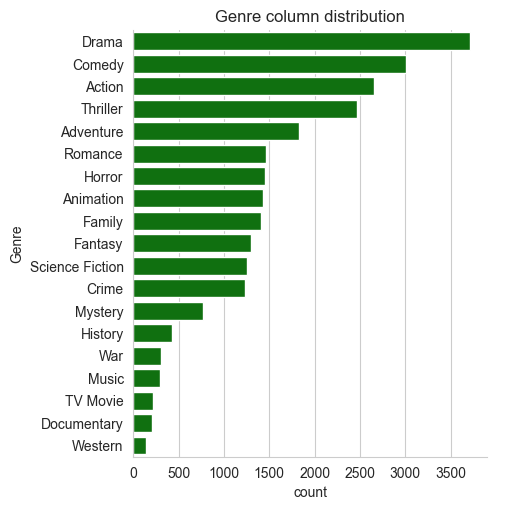

In [304]:
sns.catplot(y='Genre', data=df, kind='count',
            order=df['Genre'].value_counts().index,
            color='green')
plt.title('Genre column distribution')
plt.show()

Q2. Which has highest votes in vote_average column?

In [305]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction
3,1970,The Batman,3827.658,1151,Popular,Crime
4,1970,The Batman,3827.658,1151,Popular,Mystery


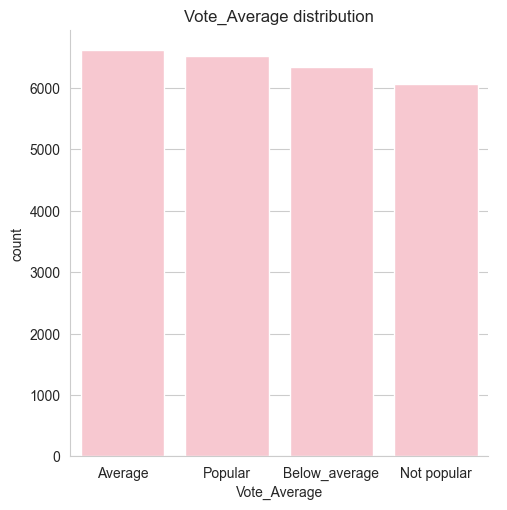

In [306]:
sns.catplot(x='Vote_Average', data=df, kind='count',
           order=df['Vote_Average'].value_counts().index,
           color='pink')
plt.title('Vote_Average distribution')
plt.show()

Q3. Which movie got the highest popularity? What's its genre?

In [307]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure
2,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Science Fiction


Q4. Which movie got the lowest popularity? What's its genre?

In [308]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,1970,The United States vs. Billie Holiday,13.354,152,Average,Music
25547,1970,The United States vs. Billie Holiday,13.354,152,Average,Drama
25548,1970,The United States vs. Billie Holiday,13.354,152,Average,History
25549,1970,Threads,13.354,186,Popular,War
25550,1970,Threads,13.354,186,Popular,Drama
25551,1970,Threads,13.354,186,Popular,Science Fiction


Q5. Which year has the most filmed movies?

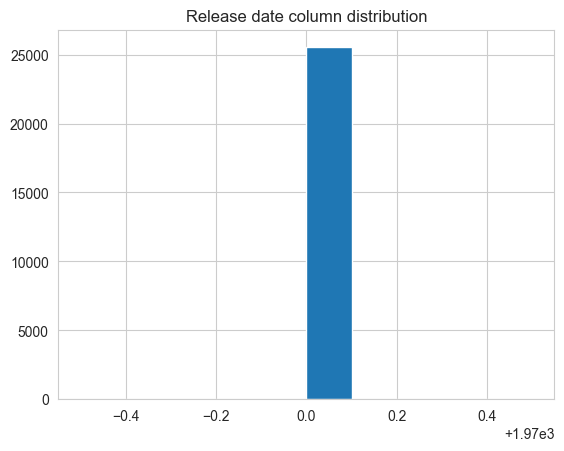

In [309]:
df['Release_Date'].hist()
plt.title('Release date column distribution')
plt.show()

Conclusion:
Q1. What is the most frequent genre of movies released on netflix
Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the times among 19 other genre.
Q2. Which has highest votes in vote_average column?
We have 25.5% of our dataset with popular vote(6520 rows). Drama again gets the highest popularity aming fans by being having more than 18.5% of movies popularity.
Q3. Which movie got the highest popularity? What's its genre?
Spider-man:no way home has the highest popularity rate in our dataset and it has genre of action, adventure and science-fiction.
Q4. Which movie got the lowest popularity? What's its genre?
The united states, thread has the lowest rate in our dataset and it has genre of music, drama, war, sci-fi and history.
Q5. Which year has the most filmed movies?
Year 2020 has the highest filming rate in our dataset.

In [310]:
df.head(2)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Action
1,1970,Spider-Man: No Way Home,5083.954,8940,Popular,Adventure


In [311]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\user\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [312]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [331]:
X = df[['Release_Date', 'Vote_Count', 'Popularity', 'Genre','Vote_Average']]
y = df['Vote_Average']

X = pd.get_dummies(X, columns=['Genre'], drop_first=True)
X = pd.get_dummies(X, columns=['Vote_Average'], drop_first=True)

In [332]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [333]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=2000))
])

In [334]:
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [347]:
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [343]:
new_movie = pd.DataFrame(0.0, index=[0], columns=X.columns)

new_movie['Release_Date'] = 2024
new_movie['Vote_Count'] = 9000
new_movie['Popularity'] = 5200
new_movie['Genre_Adventure'] = 1.0
new_movie['Vote_Average_Average'] = 1.0

In [344]:
prediction = pipeline.predict(new_movie)

In [345]:
print(X.columns)

Index(['Release_Date', 'Vote_Count', 'Popularity', 'Genre_Adventure',
       'Genre_Animation', 'Genre_Comedy', 'Genre_Crime', 'Genre_Documentary',
       'Genre_Drama', 'Genre_Family', 'Genre_Fantasy', 'Genre_History',
       'Genre_Horror', 'Genre_Music', 'Genre_Mystery', 'Genre_Romance',
       'Genre_Science Fiction', 'Genre_TV Movie', 'Genre_Thriller',
       'Genre_War', 'Genre_Western', 'Vote_Average_Below_average',
       'Vote_Average_Average', 'Vote_Average_Popular'],
      dtype='object')


In [346]:
if prediction[0] == 1:
    print("Movie will be POPULAR")
else:
    print("Movie will NOT be popular")

Movie will NOT be popular


In [348]:
X = X.drop(columns=['Vote_Average_Average'], errors='ignore')

In [349]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


In [350]:
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8166699276071219
